# THE SPARKS FOUNDATION - GRIP

# DATA SCIENCE AND BUSINESS ANALYTICS

# NAME: ALPHONSE ROSE PHILIP

# TASK 2 : Prediction Using Unsupervised ML
From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually

Dataset: https://bit.ly/3kXTdox

# I. Importing Libraries & Loading Data

In [2]:
# Importing Libraries.

import pandas as pd # to load the data.
import numpy as np
import matplotlib.pyplot as plt # to visualize the data
import seaborn as sns
%matplotlib inline

In [3]:
# Loading Data into Python Interpreter.

data = pd.read_csv("c:/Users/bonyt/OneDrive/Desktop/Internship/Task-2/Iris.csv")
print("Data has been imported successfully into interpreter.")

Data has been imported successfully into interpreter.


# II. Visualizing Raw Data & Gaining Insights

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Previewing the data.
print("Given below is the data imported from the CSV file.")
data.head()

Given below is the data imported from the CSV file.


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# III. Plotting the Data

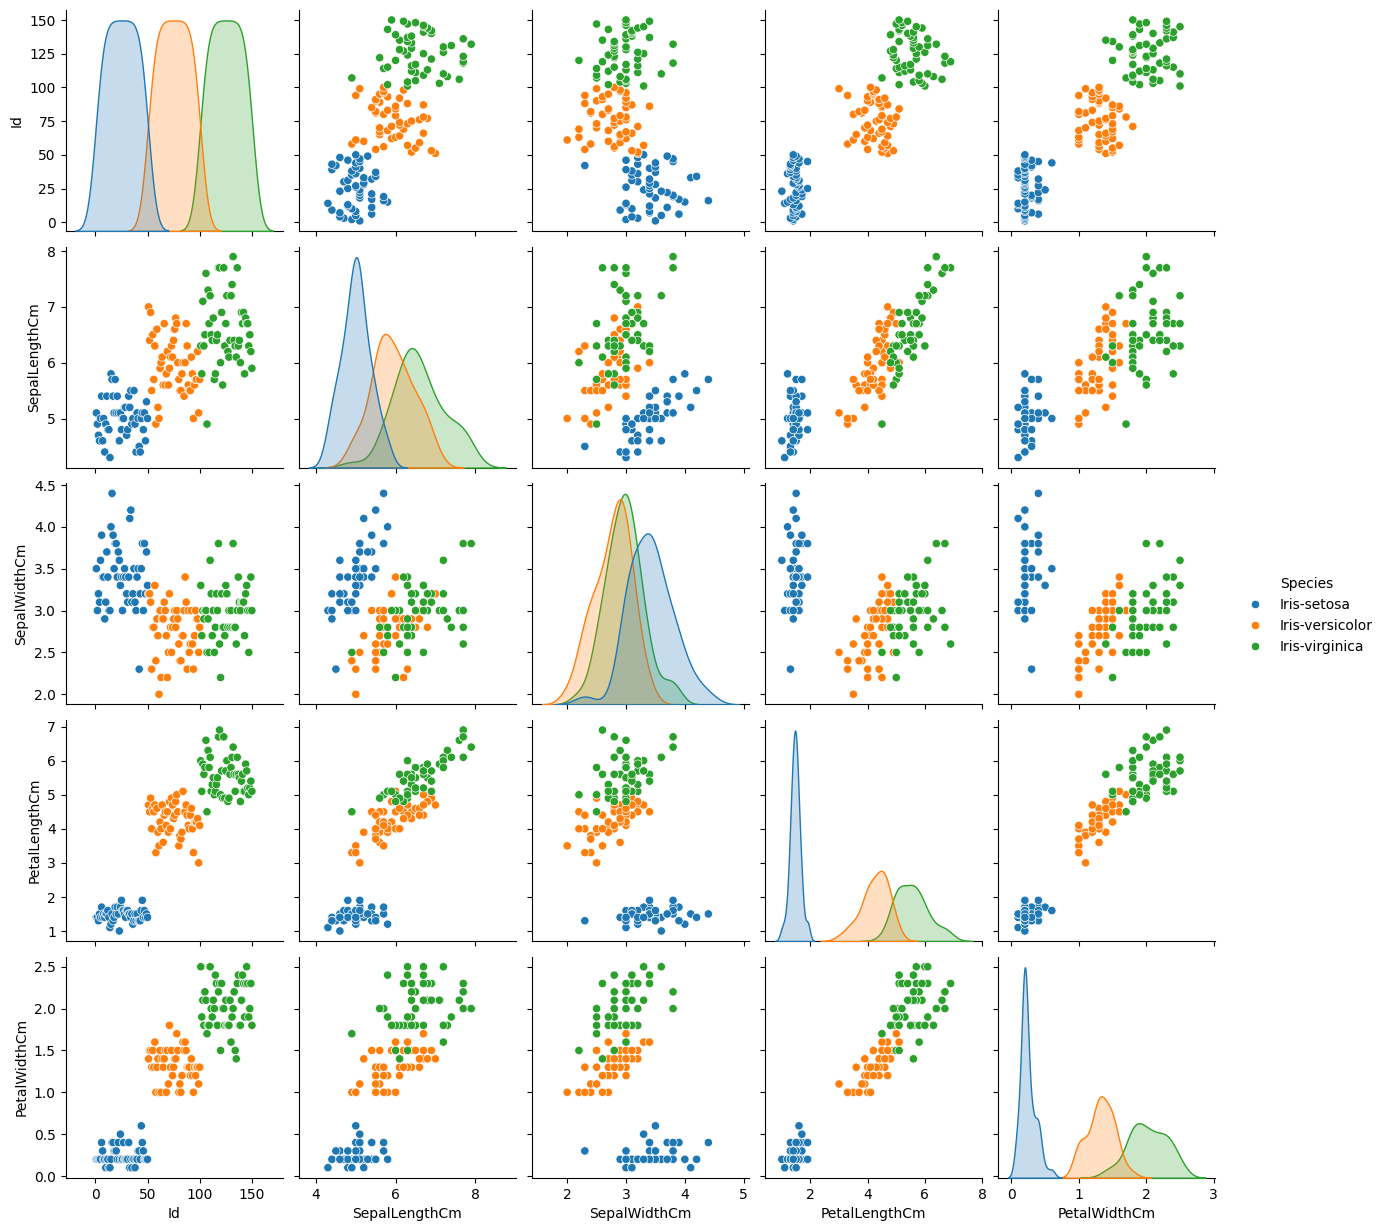

In [9]:
sns.pairplot(data, hue = 'Species')

PetalLength and PetalWidth appear to be positively correlated, i.e. having a linear relationship. Iris Setosa seems to have a smaller petal length and petal width as compared to others. Overall, it seems to be the case that Iris Setosa has smaller dimensions than other flowers. Thus, it can be conclusively said that the Iris Setosa makes a distinctive cluster in every parameter, while the other two species tend to overlap each other to a certain extent.

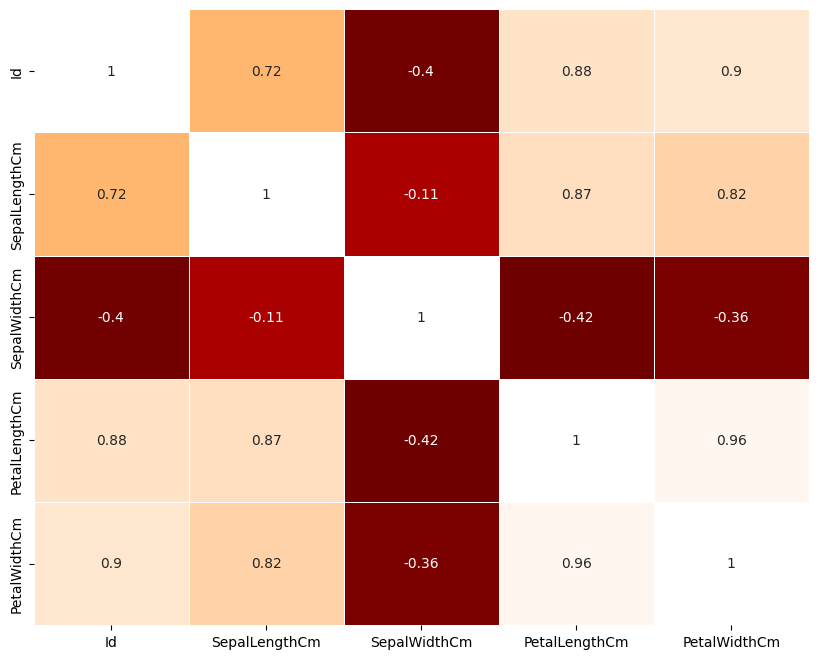

In [12]:
# correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="gist_heat")

plt.show()


The petal measurements have a highly positive correlation, while the sepal ones are uncorrelated. Worth mentioning that the petal features also have a relatively high correlation with SepalLength, but not with SepalWidth.

C:\Users\bonyt\AppData\Local\Temp\ipykernel_9968\129603377.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Species", data=data, palette="Set2")


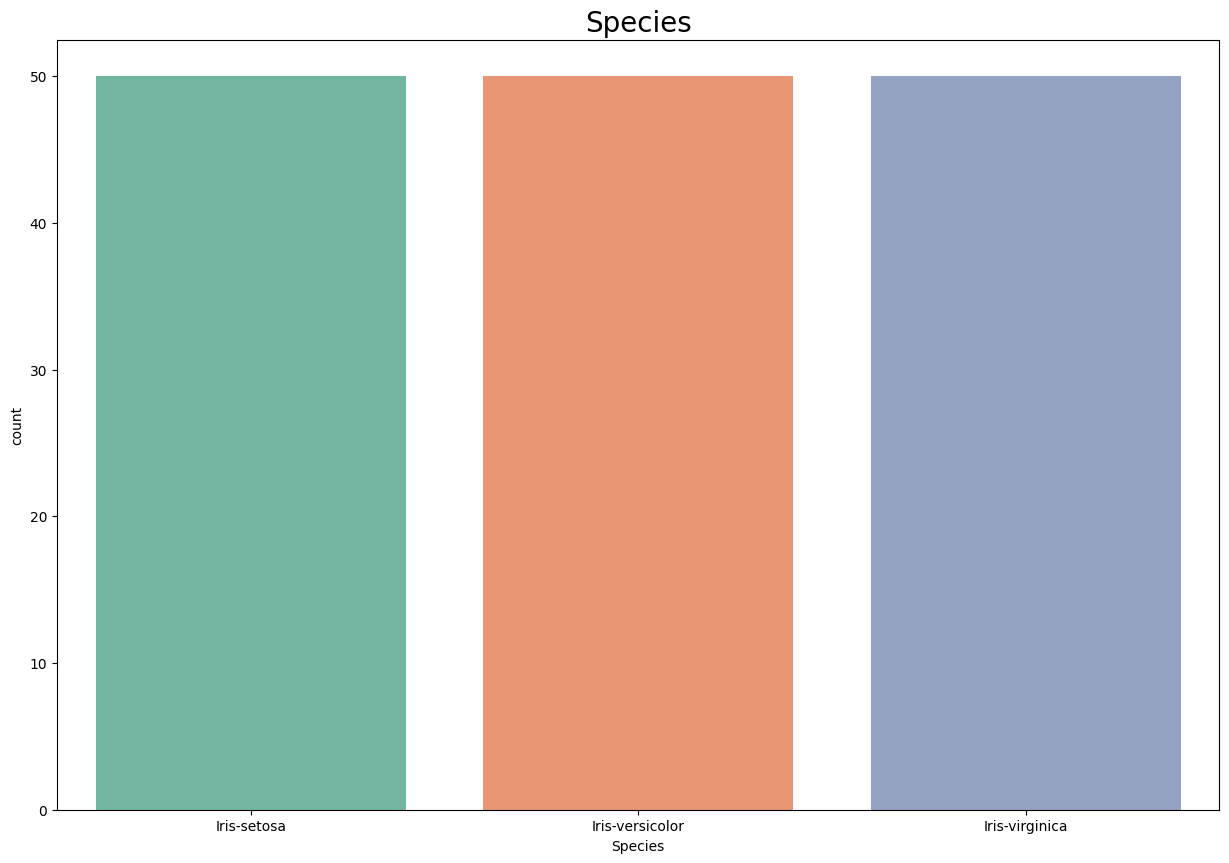

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the countplot with a predefined seaborn palette
sns.countplot(x="Species", data=data, palette="Set2")
plt.title('Species', fontsize=20)
plt.rcParams["figure.figsize"] = 15, 10
plt.show()


In [19]:
# Print out the column names
print(data.columns)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


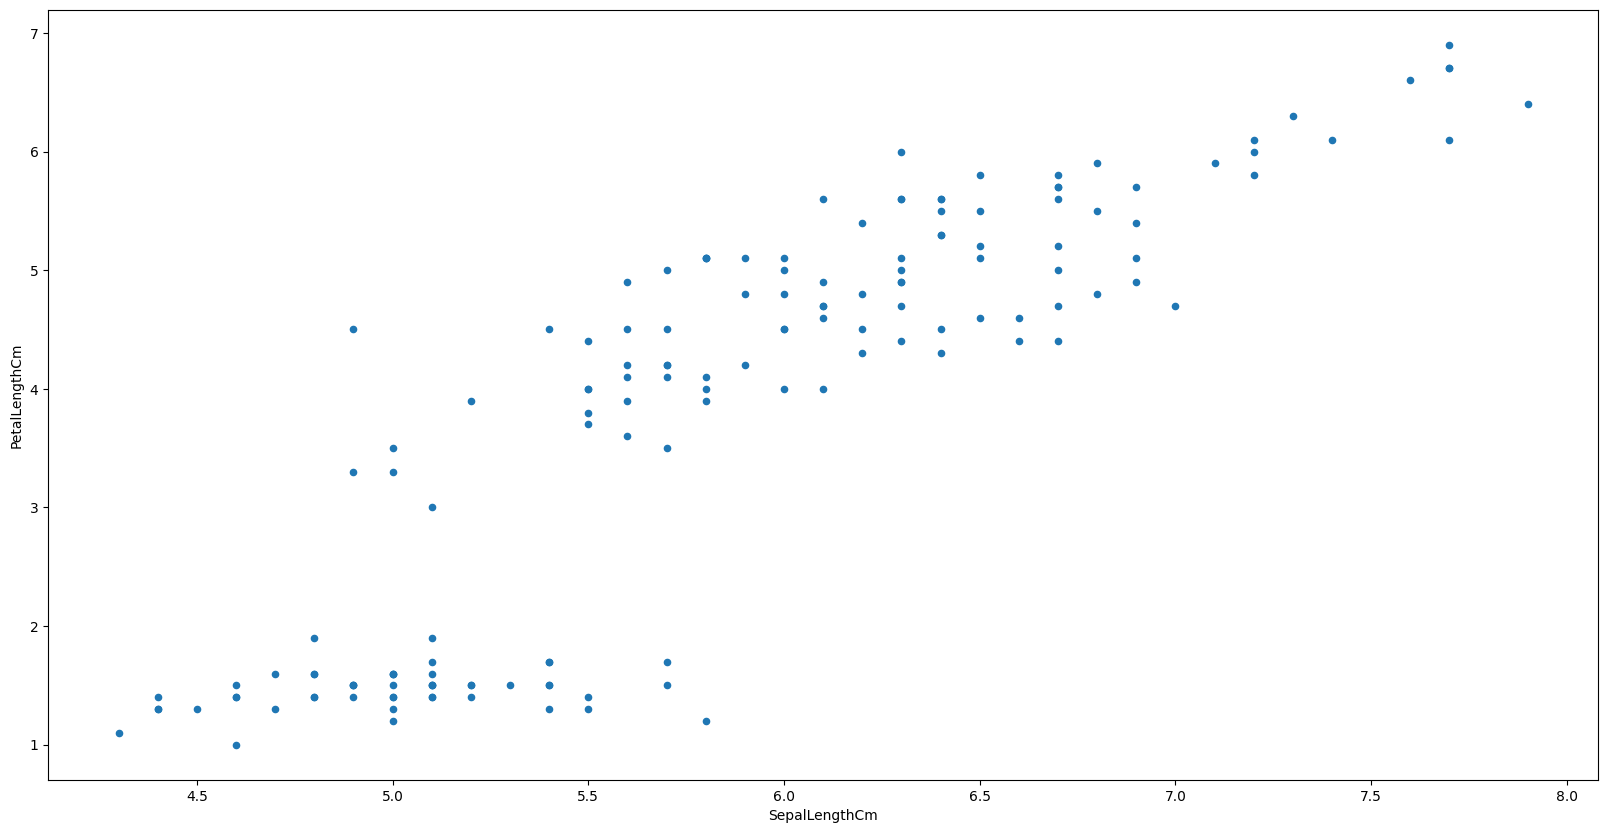

In [25]:
import matplotlib.pyplot as plt

# Correct column names based on the actual column names in your DataFrame
data.plot(kind="scatter", x="SepalLengthCm", y="PetalLengthCm")
plt.rcParams["figure.figsize"] = 20, 10
plt.show()


The above scatterplot is comprised of two variables, SepalLength on the x-axis and PetalLength on the y-axis. If the value along the y-axis seems to increase as the x-axis increases(or decreases), it indicates a positive (or negative) linear relationship.

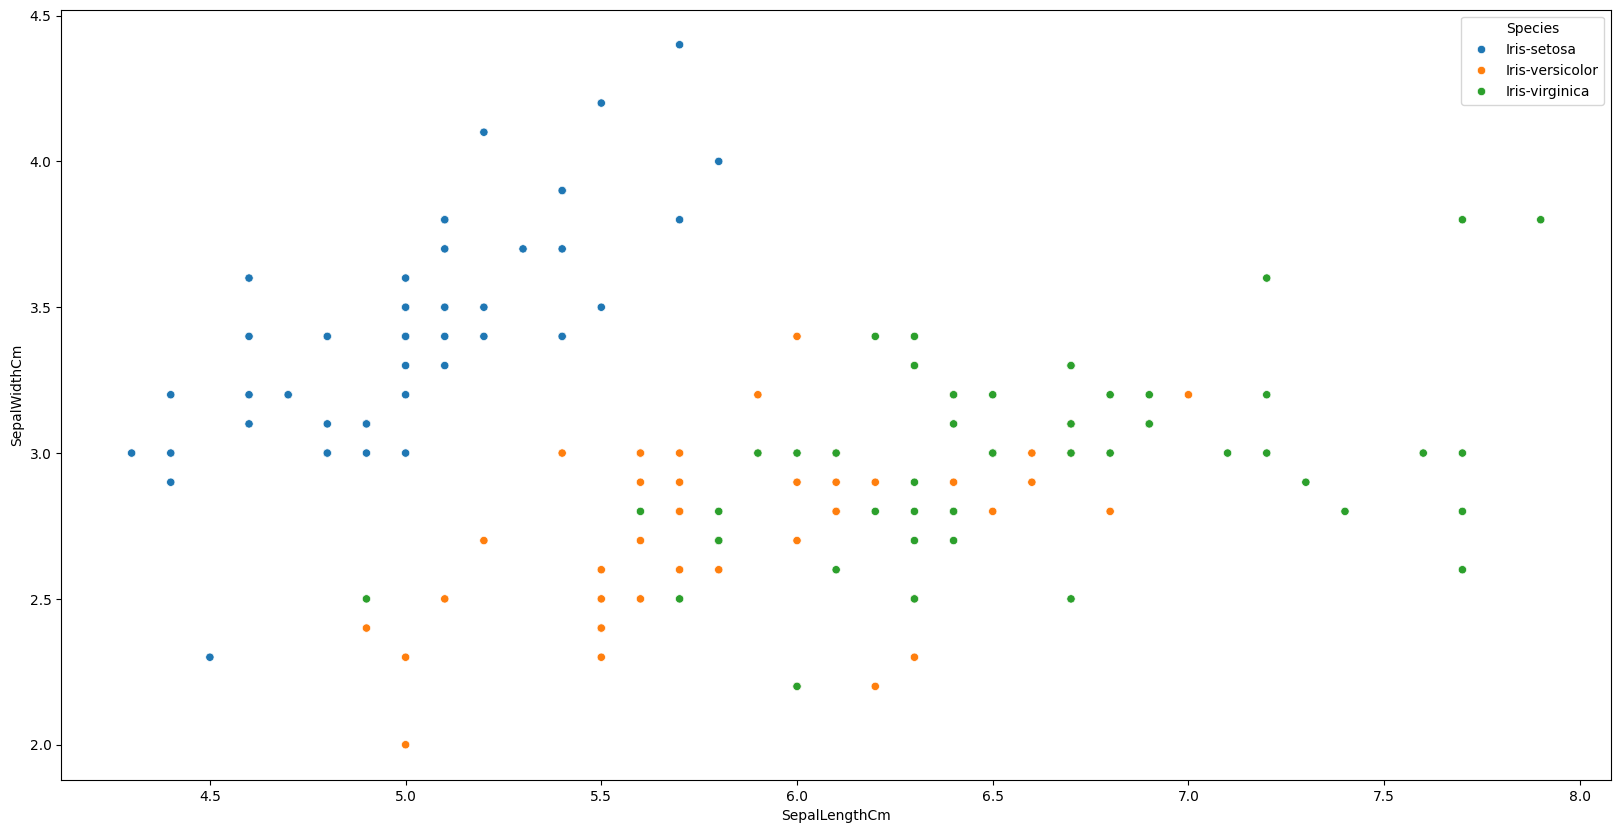

In [27]:
sns.scatterplot(x = data["SepalLengthCm"], y = data["SepalWidthCm"], hue = data["Species"])
plt.show()
plt.rcParams["figure.figsize"]=15,10

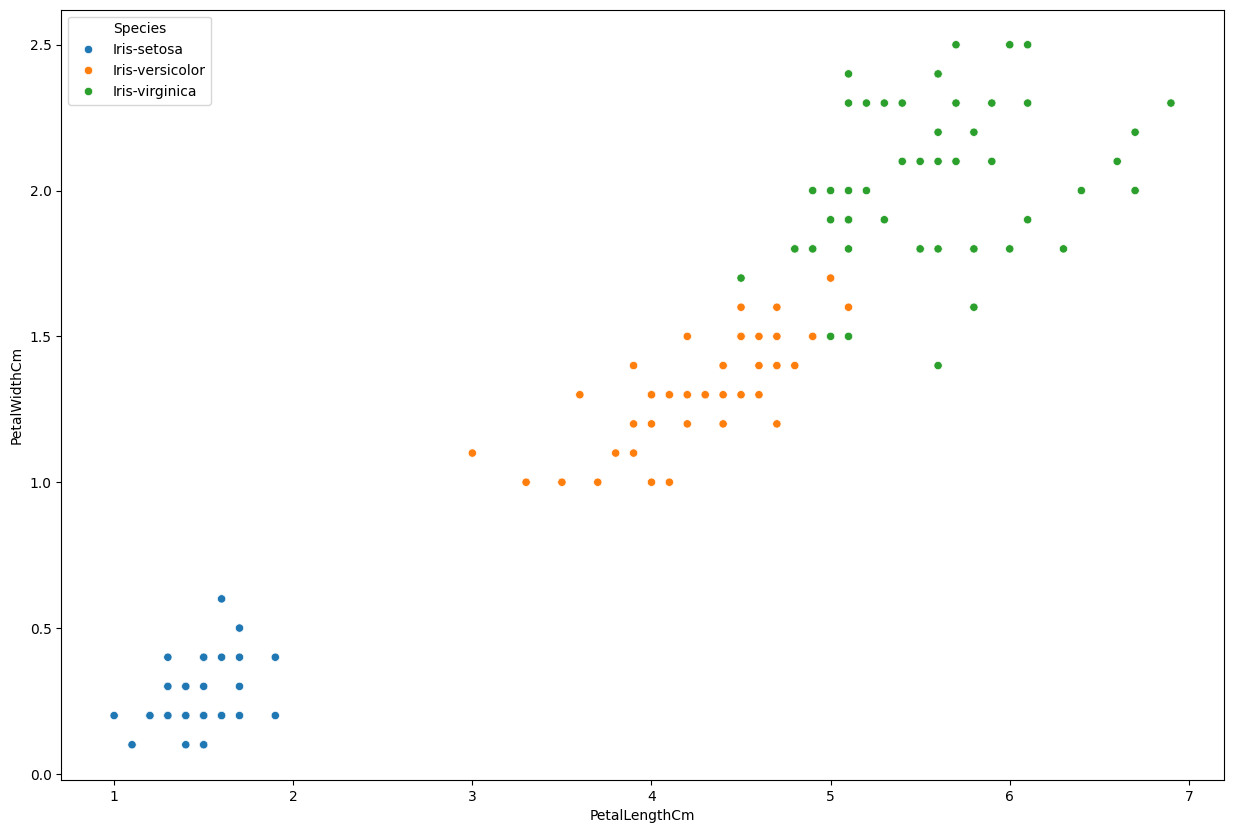

In [28]:
sns.scatterplot(x = data["PetalLengthCm"], y = data["PetalWidthCm"], hue = data["Species"])
plt.show()
plt.rcParams["figure.figsize"]=15,10

# Finding Optimal No. of Clusters — Elbow Method
In this process, the first step is to take the values for attributes X (input) from the data.

In [29]:
# Taking values for "X".

X = data.iloc[:, [1, 2, 3, 4]].values
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Now that our attributes have been established, the next step is to identify the optimum number of clusters from our data. 
This is done using the Elbow Method in the Scikit-Learn library.

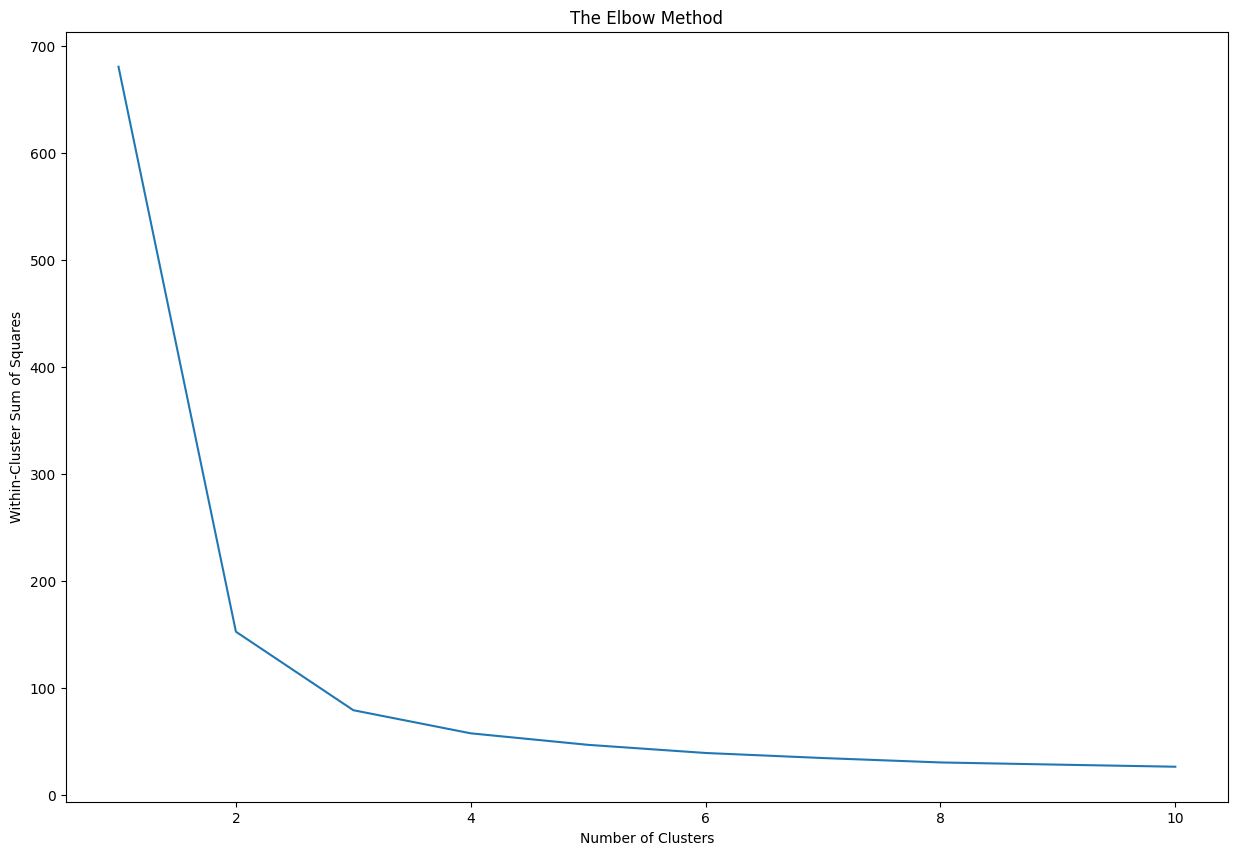

In [30]:
from sklearn.cluster import KMeans
WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

plt.rcParams["figure.figsize"]=15,10
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares') # Within-cluster Sum of Squares
plt.show()

 The optimum number of clusters is where the “elbow” point occurs, i.e. at “3”. This is when the Within-Cluster Sum of Squares (WCSS) does not decrease significantly with every iteration. So, it can be concluded that “3” is the best value for k to be used to create the final model.

# Prepare Data for Machine Learning Algorithm

In [31]:
# Checking for Null Values.
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Creating the K-Means Classifier

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_kmeans = kmeans.fit_predict(X)
print(Y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# Visualising the Clusters


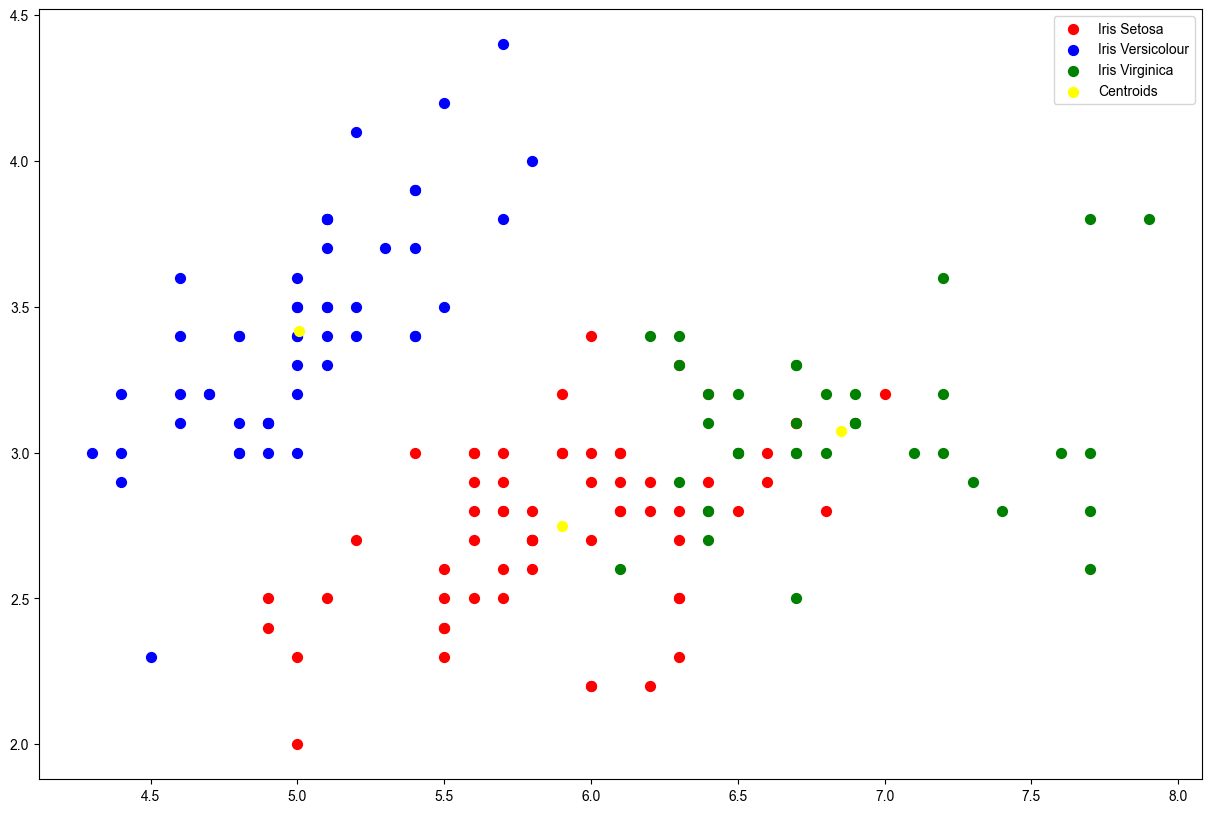

In [33]:
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris Setosa')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris Versicolour')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris Virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')
plt.legend()
sns.set(rc={'figure.figsize':(15,10)})

There are three clusters being made in actual data. According to the results, our machine learning model is suggesting that there is some overlapping in Iris Setosa and Iris Virginica.

# Predicting Clusters
First, we will identify the center points of the data.

In [39]:
from sklearn.cluster import KMeans

# Create and fit the KMeans model with additional parameters
km = KMeans(n_clusters=3, n_init=10, random_state=21)
km.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=21)

In [40]:
centers = kmeans.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


Next, we predict clustered results and compare them with our original data.

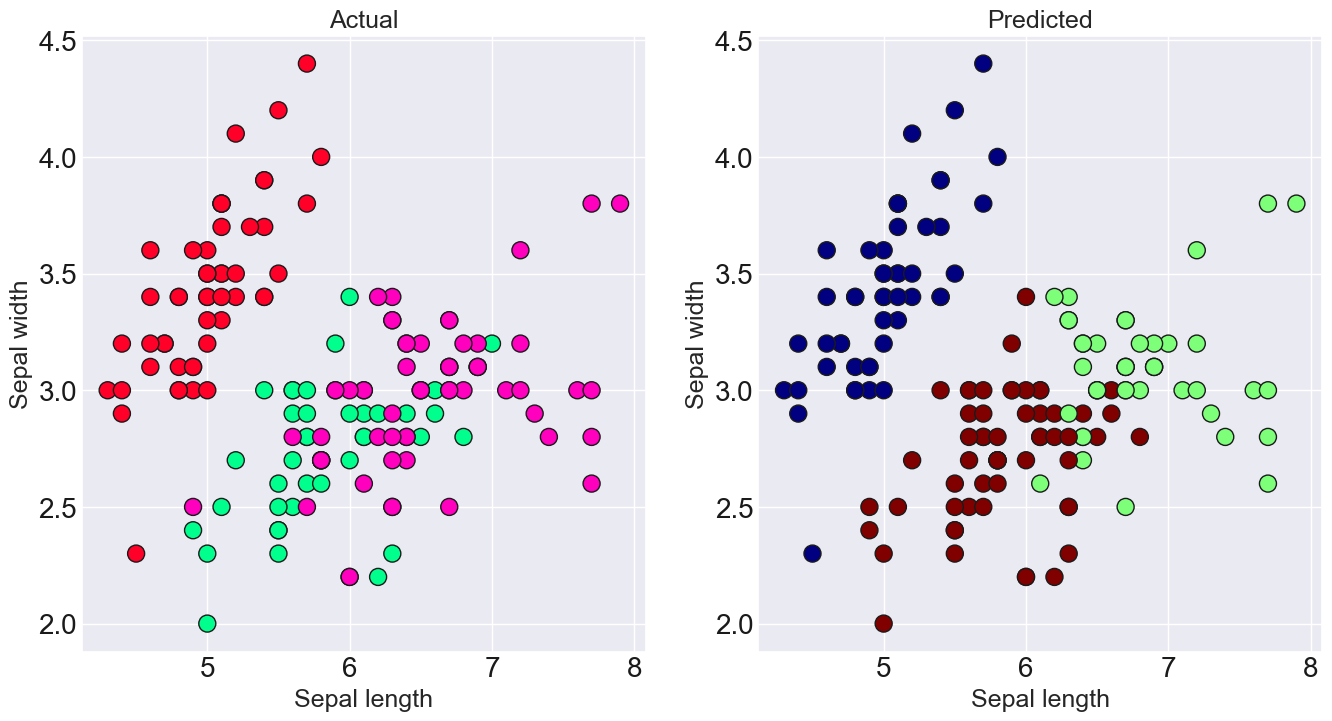

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create and fit the KMeans model
km = KMeans(n_clusters=3, random_state=21)
km.fit(X)

# Get the cluster labels
new_labels = km.labels_

# Plot the identified clusters and compare with the true labels
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot with true labels
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)

# Plot with predicted cluster labels
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=150)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Predicted', fontsize=18)

plt.show()


# Conclusion
The project’s main goal was to use the Iris dataset for introductory machine learning development. It also served as a basis for developing a better understanding of how the K-Means algorithm works and what goes into its training and evaluation. Like everything else, there are many advantages and disadvantages when it comes to deploying this algorithm.